In [5]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'S')

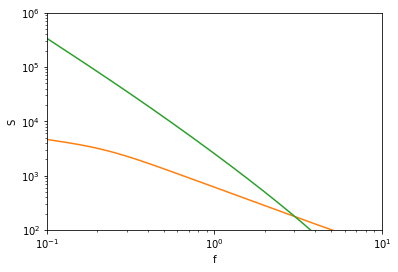

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

def f(s, t):
    phi = s[0]
    psi = s[1]
    dphidt = (-1 * phi * psi * psi) + psi
    dpsidt = (-1 * phi * phi * psi) + 2 * phi
    return [dphidt, dpsidt]


t = np.arange(0, 100, 0.01)

s0 = [10, 10]
s = odeint(f, s0, t)

psi = np.array(s[:, 1])
phi = np.array(s[:, 0])
plt.plot(psi, phi, linewidth=2.0)

plt.xlabel("psi")
plt.ylabel("phi")
#plt.show()

fourier = np.fft.rfft(phi)
abs = np.abs(fourier)
power = np.square(abs)
freq = np.linspace(0, 15, len(power))
plt.plot(freq, power)
fourier = np.fft.rfft(psi)
abs = np.abs(fourier)
power = np.square(abs)
freq = np.linspace(0, 15, len(power))
plt.plot(freq, power)
plt.ylim([100, 1000000])
plt.xlim([0.1, 10])
plt.yscale('log')
plt.xscale('log')
plt.xlabel("f")
plt.ylabel("S")

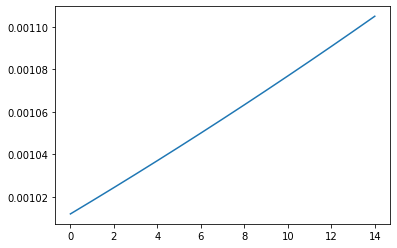

In [7]:
psi_v = []
phi_v = []


def rec_phi(t, phi, psi, n):
  if n == 0:
    return (phi +psi*t)/(1+pow(psi, 2)*t)
  else:
    return (rec_phi(t, phi, psi, n-1) +rec_psi(t, phi, psi, n-1)*t)/(1+pow(rec_psi(t, phi, psi, n-1), 2)*t)

def rec_psi(t, phi, psi, n):
  if n == 0:
    return (psi +2*phi*t)/(1+pow(phi, 2)*t)
  else:
    return (rec_psi(t, phi, psi, n-1) +2*rec_phi(t, phi, psi, n-1)*t)/(1+pow(rec_phi(t, phi, psi, n-1), 2)*t)


for i in range(15):
  x = rec_phi(0.006, 0.001, 0.001, i+1)
  phi_v.append(x)
for i in range(15):
  x= rec_psi(0.006, 0.001, 0.001, i+1)
  psi_v.append(x)

plt. plot(phi_v)


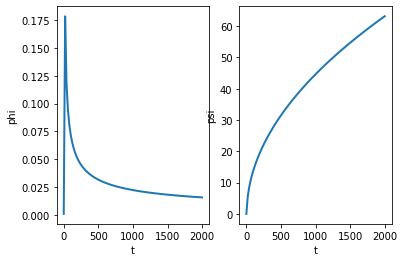

In [8]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

def f(s, t):
    phi = s[0]
    psi = s[1]
    dphidt = (-1 * phi * psi * psi) + psi
    dpsidt = (-1 * phi * phi * psi) + 2 * phi
    return [dphidt, dpsidt]

fig, (ax1, ax2) = plt.subplots(1, 2)

t = np.linspace(0, 2000, 100)

s0 = [0.001, 0.001]
s = odeint(f, s0, t)

phi = np.array(s[:, 0])
psi = np.array(s[:, 1])

temp = np.linspace(0, 1000, 100)
ax1.plot(t, phi, linewidth=2.0)
ax2.plot(t, psi, linewidth=2.0)

ax1.set(xlabel = "t", ylabel='phi')
ax2.set(xlabel = 't', ylabel='psi')

plt.show()
